In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
sns.set(style="whitegrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_style({'font.family': 'Roboto'})

## Member Hold Times EDA

**1. member_hold_times_and_packs.tsv**
* `member` - Unique identifiers for each person
* `hold_time` - number of days the person had the pack
* `pack_name` - name of the pack (may have more than 1 puzzle per pack)

In [412]:
member_df = pd.read_csv("data/member_cleaned.csv", header = 0)
member_df.head()

,member,hold_time,pack_name
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels...
1,member1,0.998885,DaVici Puzzles Full Moon Feast DaVici Puzzles ...
2,member1,10.865032,DaVici Puzzles Flying Frigate DaVici Puzzles H...
3,member1,22.083971,Liberty Puzzles Haeckel Hummingbirds Nautilus ...
4,member1,5.077603,DaVici Puzzles Diana Zimens City Of Cats


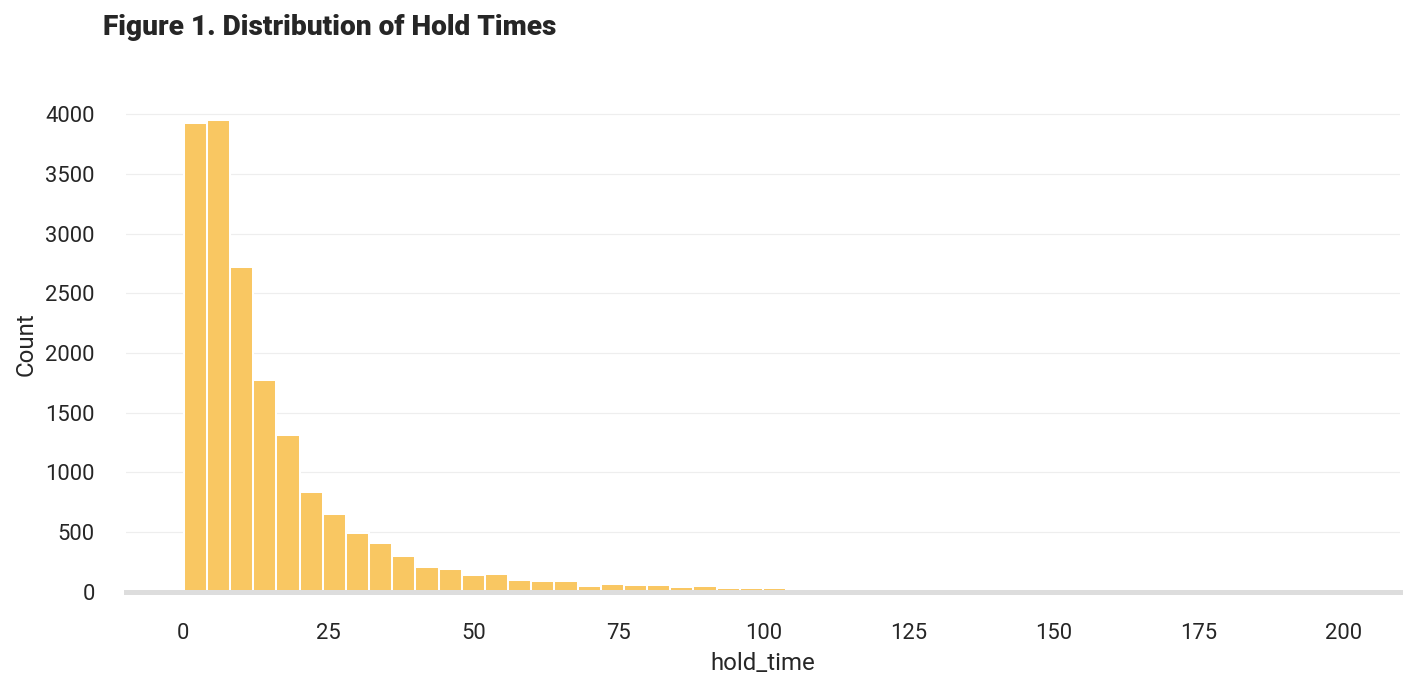

In [505]:
# Distribution of the hold times
plt.figure(figsize = (10,5))
plt.title("Figure 1. Distribution of Hold Times", weight='heavy',y =1.1, x=0.16).set_fontsize('14')
z = sns.histplot(data=member_df, x="hold_time", color="#F9C762", alpha = 1.0, bins = 50)
sns.despine(left=True, bottom=False)
z.spines['bottom'].set_color('#DDDDDD')
z.yaxis.grid(True, color='#EEEEEE')
z.xaxis.grid(False)
plt.tight_layout()
# plt.savefig("static/hold_times_dist.png", format="png", dpi=1200)
plt.show()

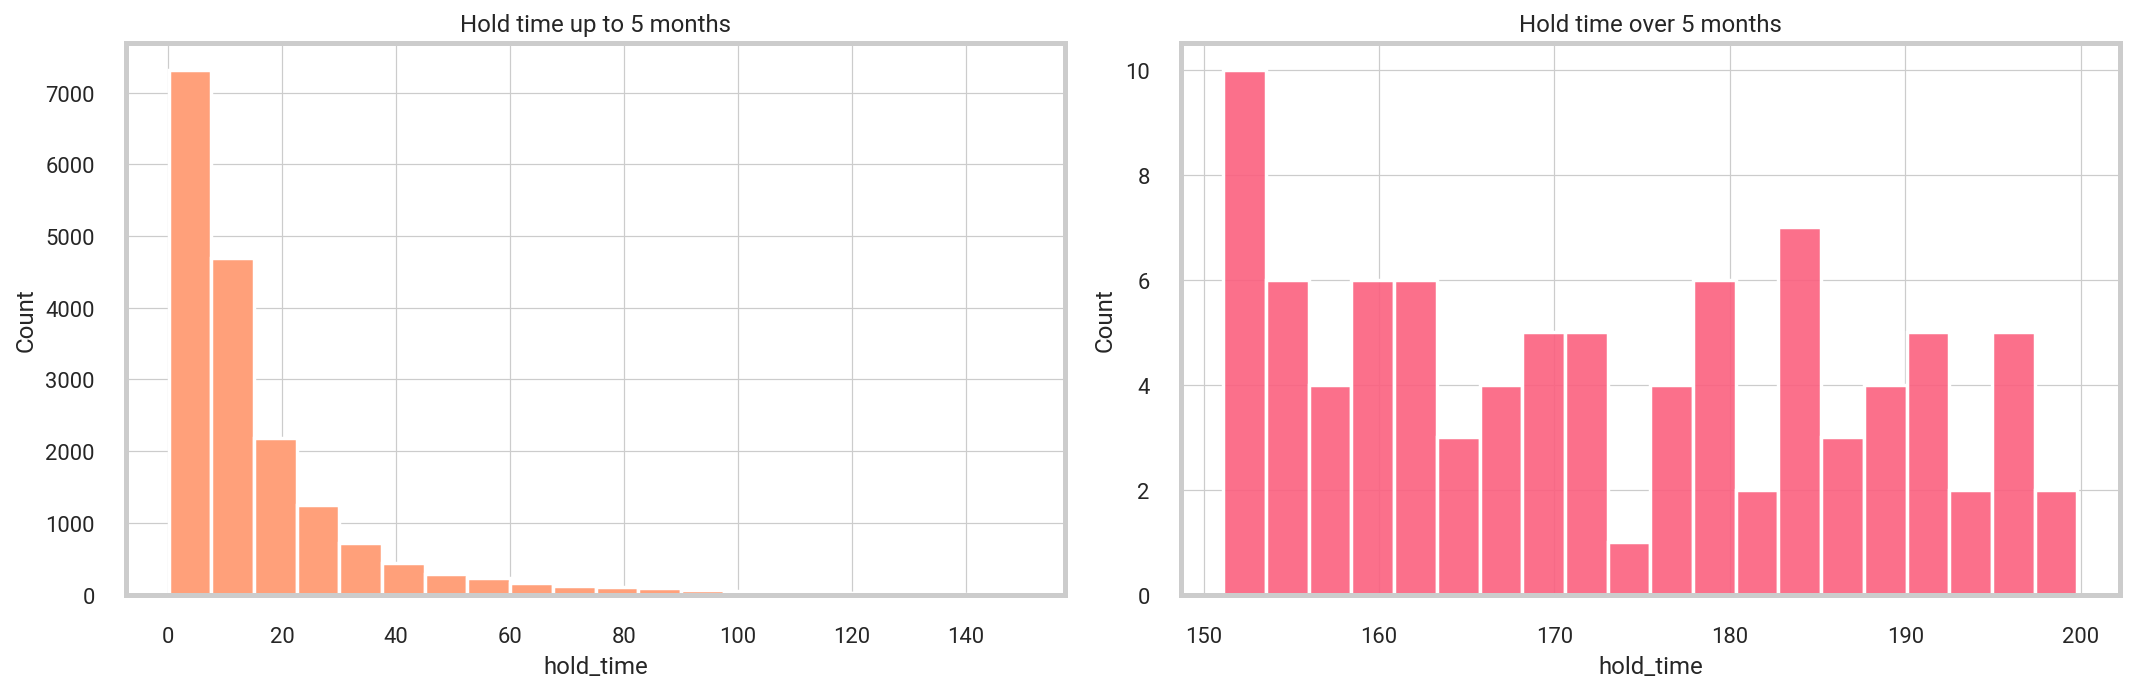

In [511]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=member_df, x=member_df.loc[member_df['hold_time'] < 150]['hold_time'], bins = 20,color="#ffa07a", alpha = 1.0, ax=axs[0])
axs[0].set_title("Hold time up to 5 months")
sns.histplot(data=member_df, x=member_df.loc[member_df['hold_time'] > 151]['hold_time'], bins = 20, color="#FB607F", alpha = 0.9, ax=axs[1])
axs[1].set_title("Hold time over 5 months")
fig.tight_layout()
#plt.savefig("static/hold_times_dist2.png", format="png", dpi=1200)
plt.show()

-------------------------------------------

## Puzzle Packs EDA


**2. packs.tsv**
* pack_name - name of the pack (may have more than 1 puzzle per pack)
* brand - brand name of puzzle pack
* piece_count - number of pieces in puzzle
* difficulty_rating - difficulty rating for puzzle

In [400]:
# Import and preview packs data
packs_df = pd.read_csv("data/packs_cleaned_dropna.csv",header = 0)
packs_df.head()

,pack_name,brand_0,brand_1,piece_count_0,piece_count_1,diff_0,diff_1,num_puzzles
0,Anne Belle Thompson The Mikado Anne Belle Thom...,Other-Hand-cut,NaN,387.0,242.0,Average,Average,2
1,Anthology Puzzles Alphonse Mucha La Plume Anth...,NaN,NaN,320.0,160.0,Average,Average,2
2,Anthology Puzzles Colorful Cat Anthology Puzzl...,NaN,NaN,150.0,170.0,Average,Average,2
3,Anthology Puzzles Framed American Gothic Antho...,NaN,NaN,320.0,300.0,Average,Average,2
4,Anthology Puzzles Over The Moon Anthology Puzz...,NaN,NaN,278.0,177.0,Hard,A-Easy,2


In [401]:
# Plot distribution for piece count
piece_count_all = pd.concat([packs_df[packs_df['piece_count_0'].notnull()]['piece_count_0'],
                             packs_df[packs_df['piece_count_1'].notnull()]['piece_count_1']])

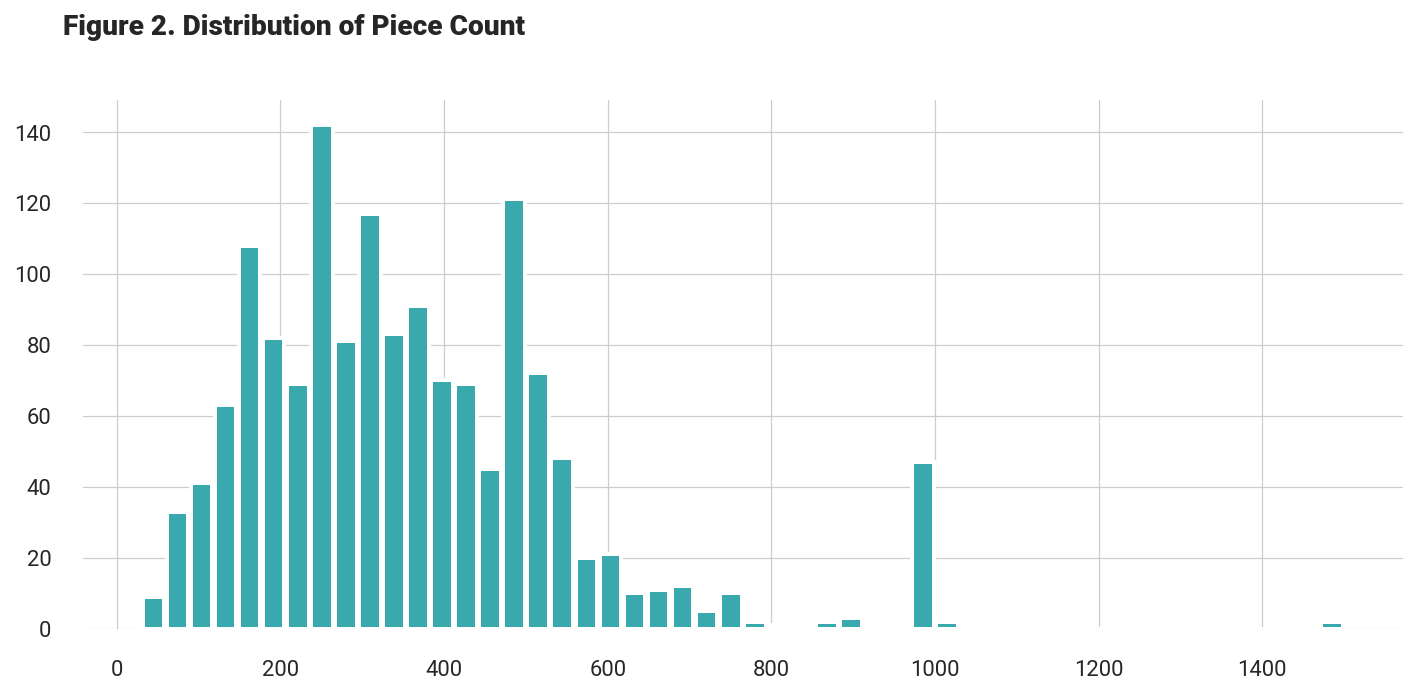

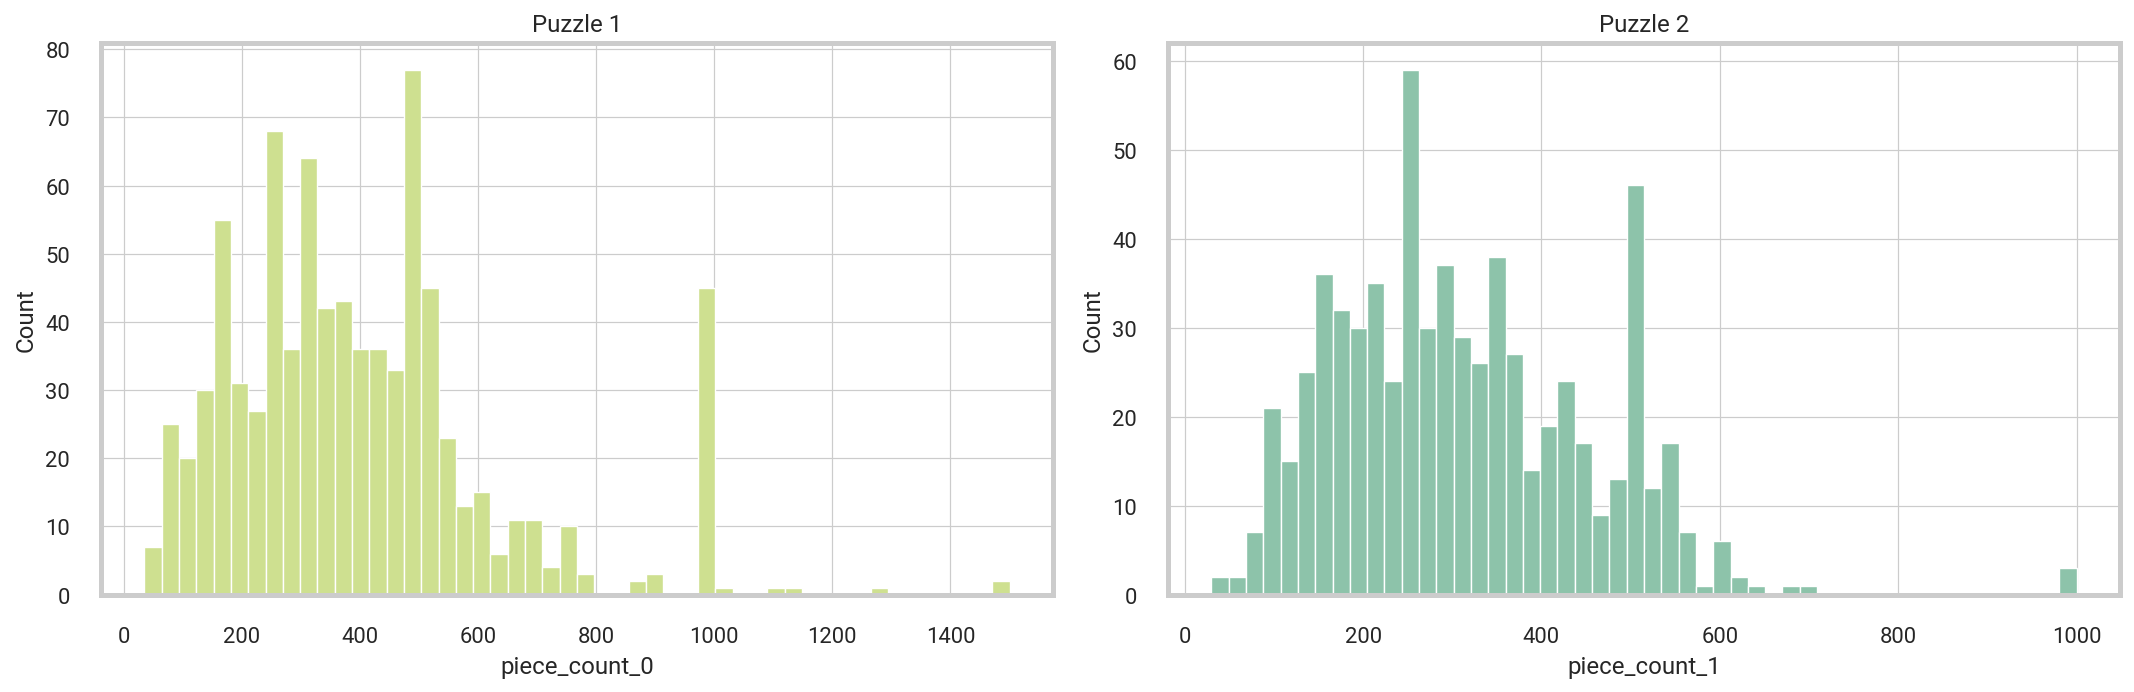

In [548]:
plt.figure(figsize = (10,5))
plt.title("Figure 2. Distribution of Piece Count", weight='heavy',y =1.1, x=0.16).set_fontsize('14')

plt.hist(piece_count_all, color='#39a9ad', rwidth=0.9, bins = 50, alpha=1)
sns.despine(left=True, bottom=True)
plt.tight_layout()
# plt.savefig("static/piece_count_dist.png", format="png", dpi=1200)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=packs_df, x=packs_df[packs_df['piece_count_0'].notnull()]['piece_count_0'], bins = 50,color="#cee090", alpha = 1.0, ax=axs[0])
axs[0].set_title("Puzzle 1")
sns.histplot(data=packs_df, x=packs_df[packs_df['piece_count_1'].notnull()]['piece_count_1'], bins = 50, color="#8dc3aa", alpha = 1.0, ax=axs[1])
axs[1].set_title("Puzzle 2")
fig.tight_layout()
# plt.savefig("static/piece_count_dist2.png", format="png", dpi=1200)
plt.show()

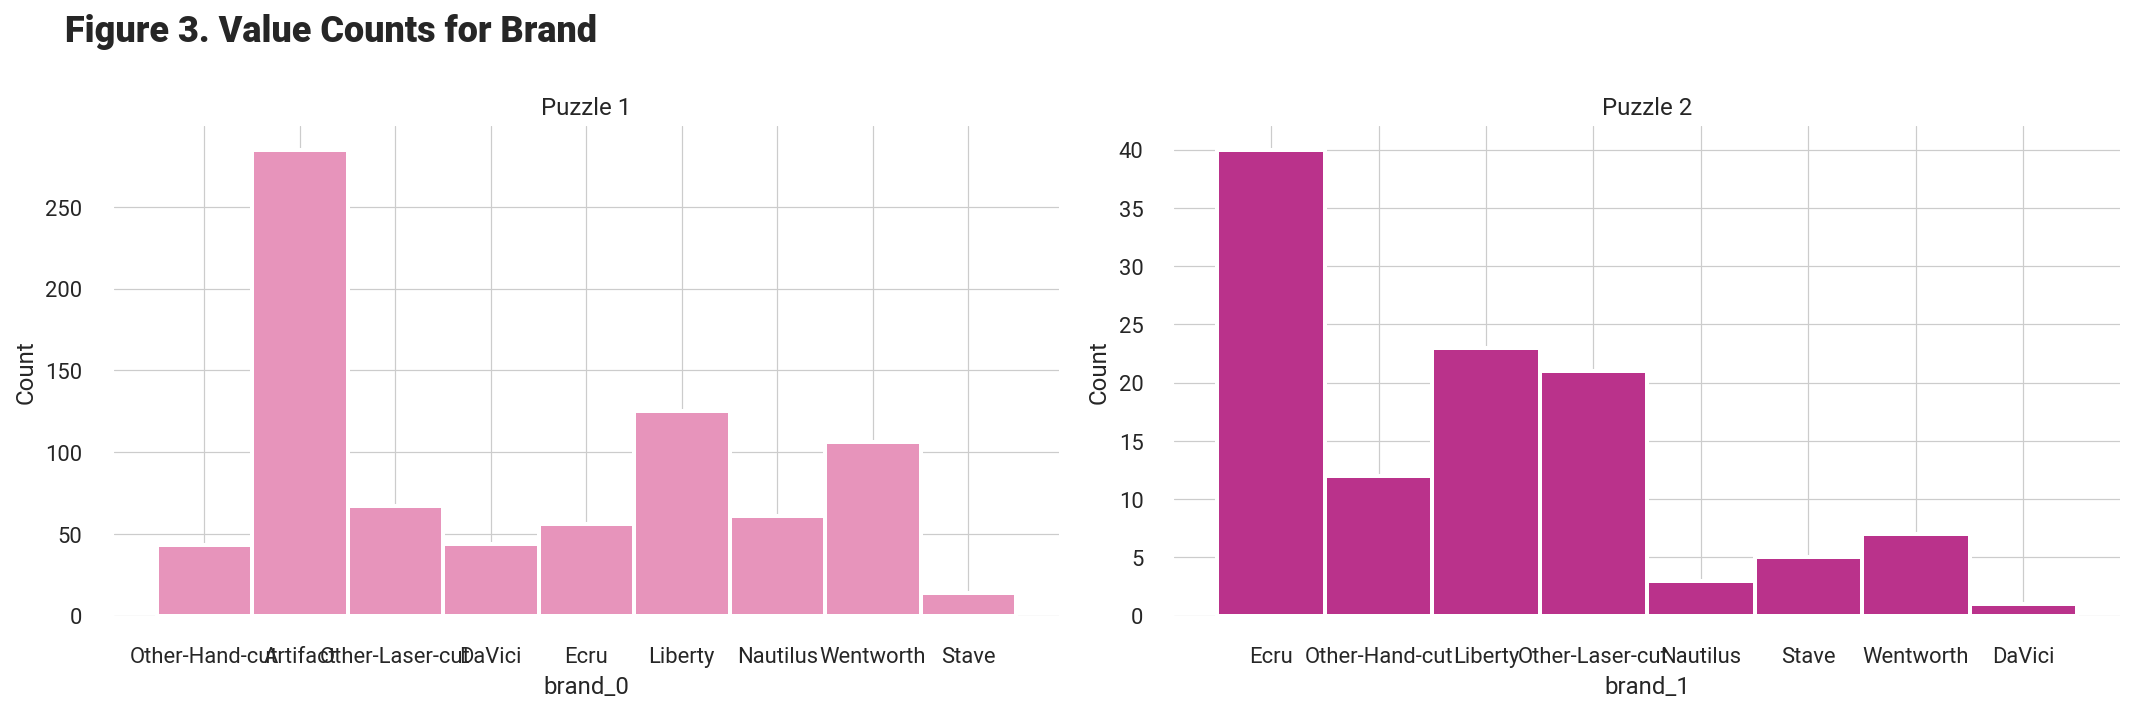

In [541]:
# Bar charts for distribution of brand
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Figure 3. Value Counts for Brand", weight='heavy',y =0.99, x=0.16).set_fontsize('18')

sns.histplot(data=packs_df, x=packs_df[packs_df['brand_0'].notnull()]['brand_0'], color="#e794bb", alpha = 1.0, ax=axs[0])
axs[0].set_title("Puzzle 1")
sns.histplot(data=packs_df, x=packs_df[packs_df['brand_1'].notnull()]['brand_1'], color="#ba328b", alpha = 1.0, ax=axs[1])
axs[1].set_title("Puzzle 2")

sns.despine(left=True, bottom=True)
fig.tight_layout()
# plt.savefig("static/brand_dist.png", format="png", dpi=1200)
plt.show()

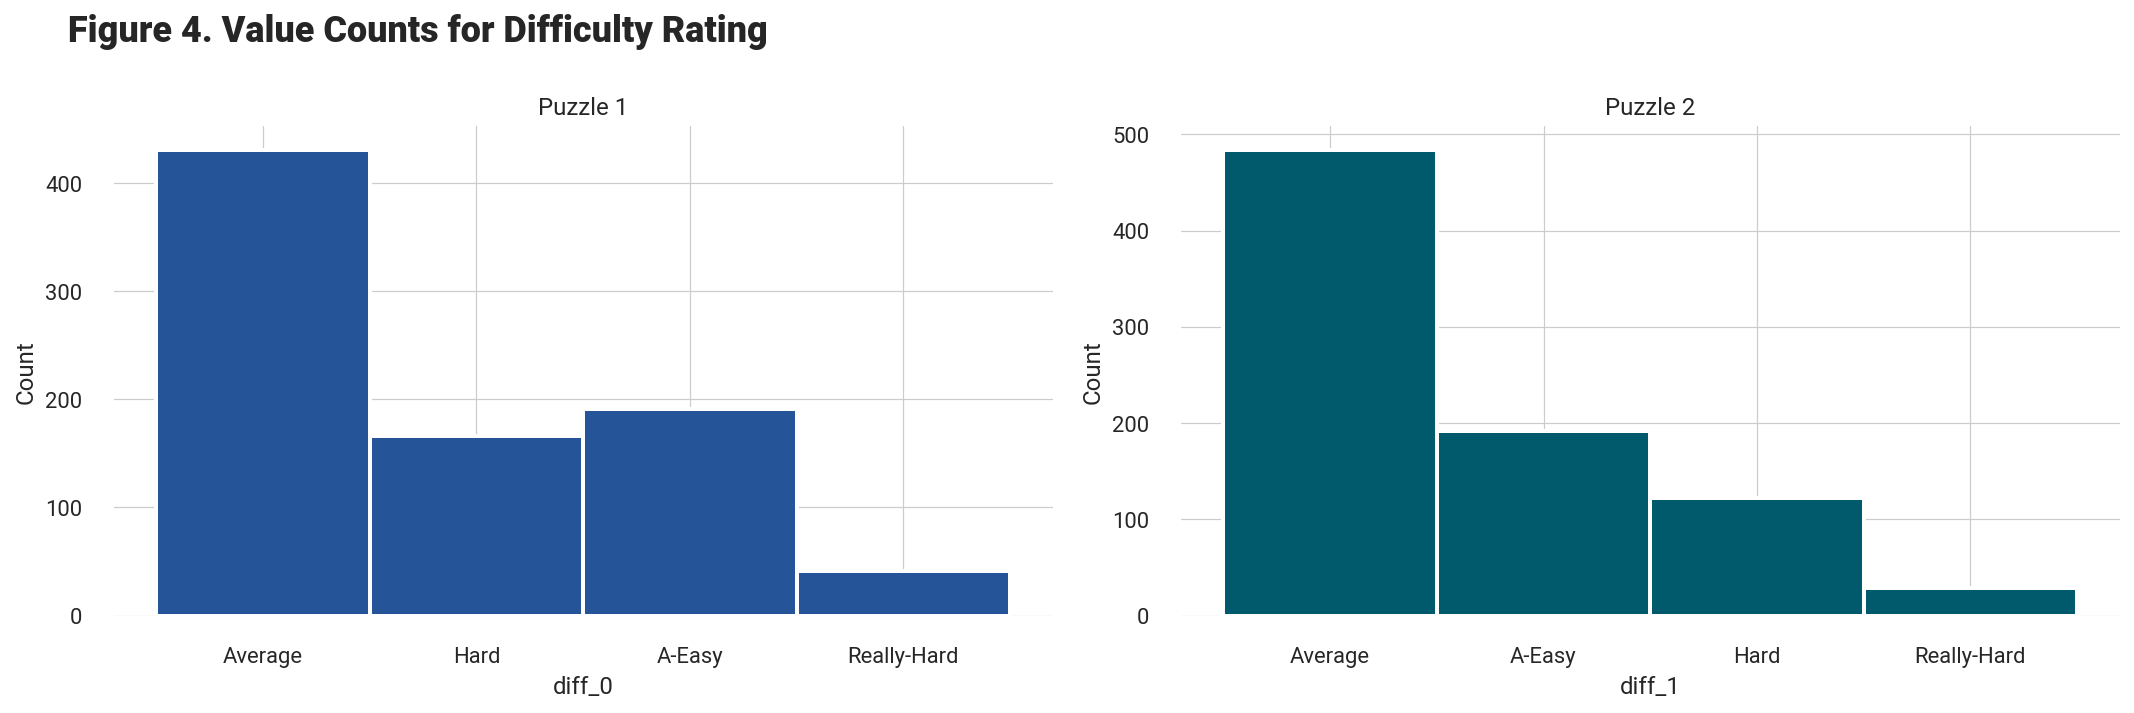

In [551]:
# Bar charts for distribution of difficulty rating
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Figure 4. Value Counts for Difficulty Rating", weight='heavy',y =0.99, x=0.2).set_fontsize('18')

sns.histplot(data=packs_df, x=packs_df[packs_df['diff_0'].notnull()]['diff_0'], color="#255498", alpha = 1.0, ax=axs[0])
axs[0].set_title("Puzzle 1")
sns.histplot(data=packs_df, x=packs_df[packs_df['diff_1'].notnull()]['diff_1'], color="#015a6c", alpha = 1.0, ax=axs[1])
axs[1].set_title("Puzzle 2")

sns.despine(left=True, bottom=True)
fig.tight_layout()
# plt.savefig("static/difficulty_dist.png", format="png", dpi=1200)
plt.show()